In [1]:
import fastai
from fastai import *
from fastai.vision import *
import pathlib

## Loading the dataset

In [2]:
path = pathlib.PosixPath('../data/asl-alphabet/')
path

PosixPath('../data/asl-alphabet')

In [3]:
data = ImageDataBunch.from_folder(path=path,ds_tfms=get_transforms(),size=224,valid_pct=0.3)
data.normalize(imagenet_stats)

In [4]:
print(data.classes)
data.c

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


29

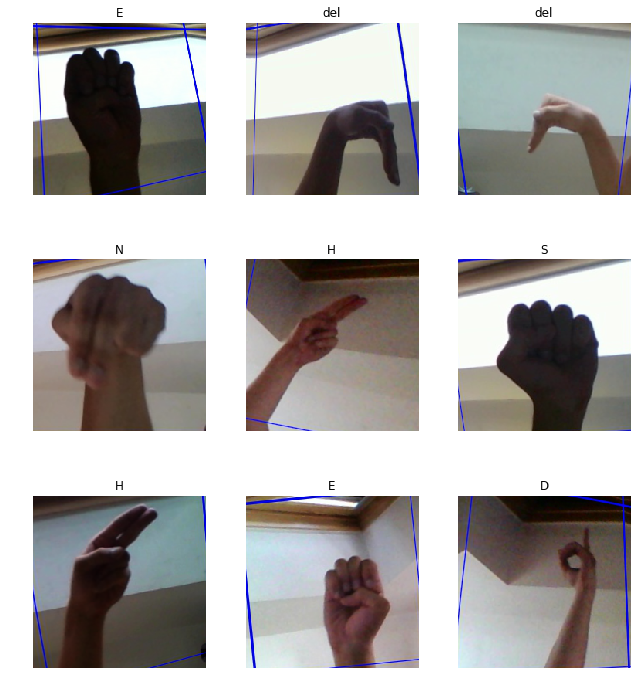

In [5]:
data.show_batch(rows=3)

## Buidling the model

In [6]:
learn = create_cnn(data,models.resnet34,metrics=accuracy)

In [9]:
learn.fit_one_cycle(4)

Total time: 3:25:40
epoch  train_loss  valid_loss  accuracy
1      0.078848    0.019713    0.993826  (55:30)
2      0.026371    0.006062    0.997485  (49:31)
3      0.018062    0.001315    0.999428  (50:57)
4      0.007635    0.000737    0.999771  (49:40)



In [10]:
learn.save('stage-1')

## Checking the results

In [11]:
interp = ClassificationInterpretationtionInterpretation.from_learner(learn)

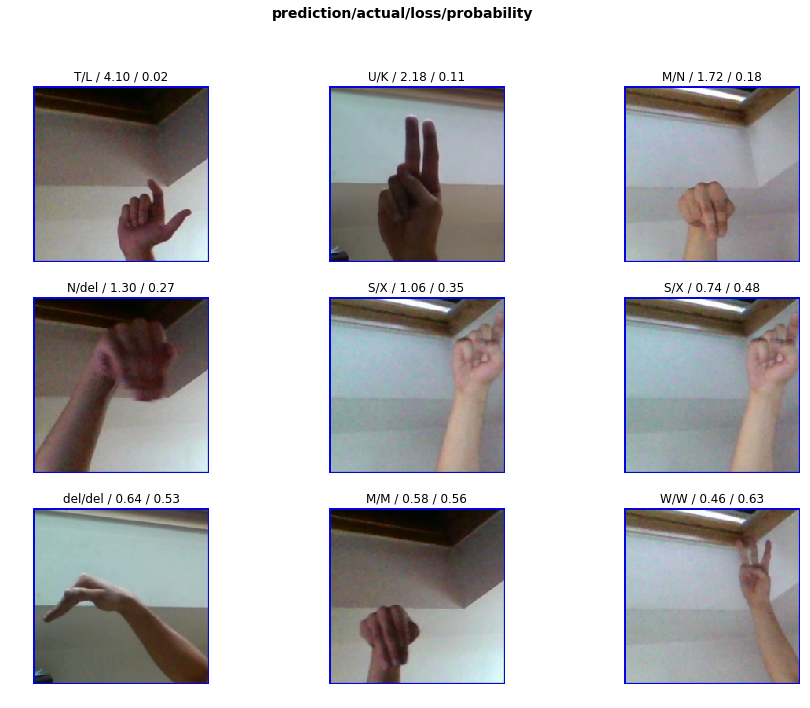

In [12]:
interp.plot_top_losses(9,figsize=(15,11))

In [7]:
learn.load('stage-1')

In [8]:
import cv2
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()   #capture each frame
#     ret = cap.set(3,224)
#     ret = cap.set(4,224)
    gt_img = cv2.imread('ground_truth.jpg')
    cv2.imshow('GROUND-TRUTH FRAME',gt_img)

    #For capturing frame and saving it as an image at given folder and making prediction on that image:
    if cv2.waitKey(1) == ord('n'):
        cv2.imwrite('test1.jpg',frame)
        img = open_image(pathlib.PosixPath('./test1.jpg'))
        label,index, pred = learn.predict(img)
        cv2.putText(frame, "Alphabet = "+label, (380, 25),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 215), 2)
        cv2.putText(frame, "Prob = {0:.4f}".format(torch.max(pred).item()), (380, 50),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        cv2.imshow("Predictions",frame)
        print("Current alphabet =\n",torch.max(pred).item())
        print("\t\t "+label+"\t\t")
    
        
    
    #making actual prediction for each frame:=============================================
    
    #For quitting the given session: ord is used to obtain unicode of the given string.
    #cv2.waitKey returns the unicode of the key which is pressed
    if cv2.waitKey(10) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Current alphabet =
 0.96916663646698
		 X		
